<a href="https://colab.research.google.com/github/Jyotishman77/demographic/blob/master/demographic_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

In [ ]:
df1 = pd.read_csv('/content/api_data_aadhar_demographic_0_500000.csv')
df2 = pd.read_csv('/content/api_data_aadhar_demographic_500000_1000000.csv')
df3 = pd.read_csv('/content/api_data_aadhar_demographic_1000000_1500000.csv')
df4 = pd.read_csv('/content/api_data_aadhar_demographic_1500000_2000000.csv')
df5 = pd.read_csv('/content/api_data_aadhar_demographic_2000000_2071700.csv')

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

print("Combined shape:", df.shape)
df.head()

Combined shape: (2071700, 6)


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-09-2025,Andaman and Nicobar Islands,Andamans,744103.0,0.0,1.0
1,01-09-2025,Andaman and Nicobar Islands,South Andaman,744103.0,0.0,2.0
2,01-09-2025,Andaman and Nicobar Islands,South Andaman,744105.0,0.0,6.0
3,01-09-2025,Andaman and Nicobar Islands,South Andaman,744106.0,0.0,2.0
4,01-09-2025,Andaman and Nicobar Islands,South Andaman,744112.0,0.0,1.0


In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
columns = ['date', 'state', 'district', 'pincode',
            'demo_age_5_17', 'demo_agr_17']
print(columns)

['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_agr_17']


Top 20 States by Total Population:


,state,total_population
37,Uttar Pradesh,8542328.0
22,Maharashtra,5054602.0
4,Bihar,4814350.0
21,Madhya Pradesh,2912938.0
32,Rajasthan,2817615.0
40,West Bengal,2723681.0
1,Andhra Pradesh,2295582.0
34,Tamil Nadu,2212228.0
6,Chhattisgarh,2005438.0
12,Gujarat,1824327.0


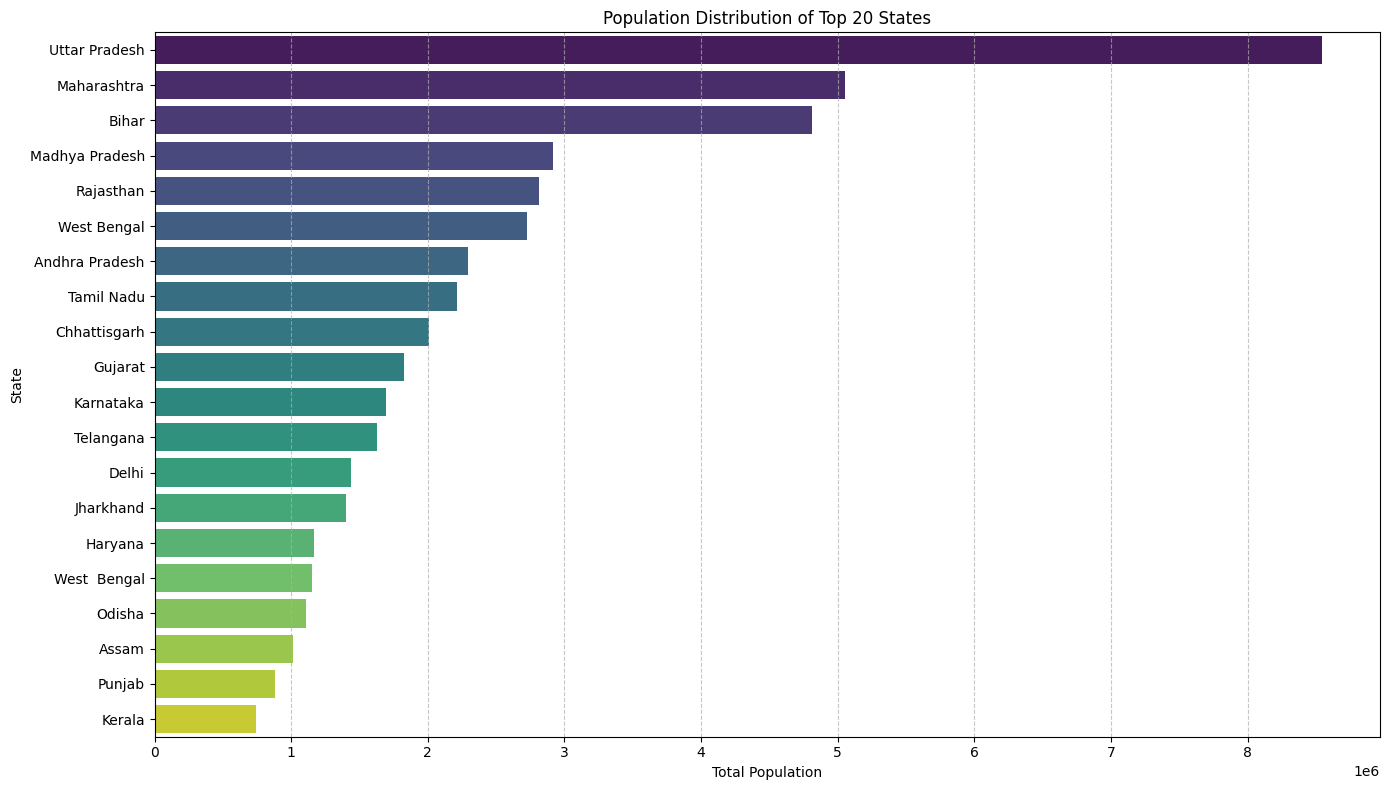

In [ ]:
df['total_population'] = df['demo_age_5_17'] + df['demo_age_17_']

state_population = df.groupby('state')['total_population'].sum().reset_index()

top_20_states = state_population.nlargest(20, 'total_population')

print("Top 20 States by Total Population:")
display(top_20_states)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x='total_population', y='state', data=top_20_states, hue='state', palette='viridis', legend=False)
plt.title('Population Distribution of Top 20 States')
plt.xlabel('Total Population')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Last 20 States by Total Population:


,state,total_population
29,Pondicherry,3.0
41,odisha,6.0
27,ODISHA,10.0
20,Lakshadweep,1176.0
9,Daman and Diu,2196.0
8,Dadra and Nagar Haveli and Daman and Diu,3740.0
19,Ladakh,5735.0
7,Dadra and Nagar Haveli,6268.0
0,Andaman and Nicobar Islands,7246.0
33,Sikkim,20340.0


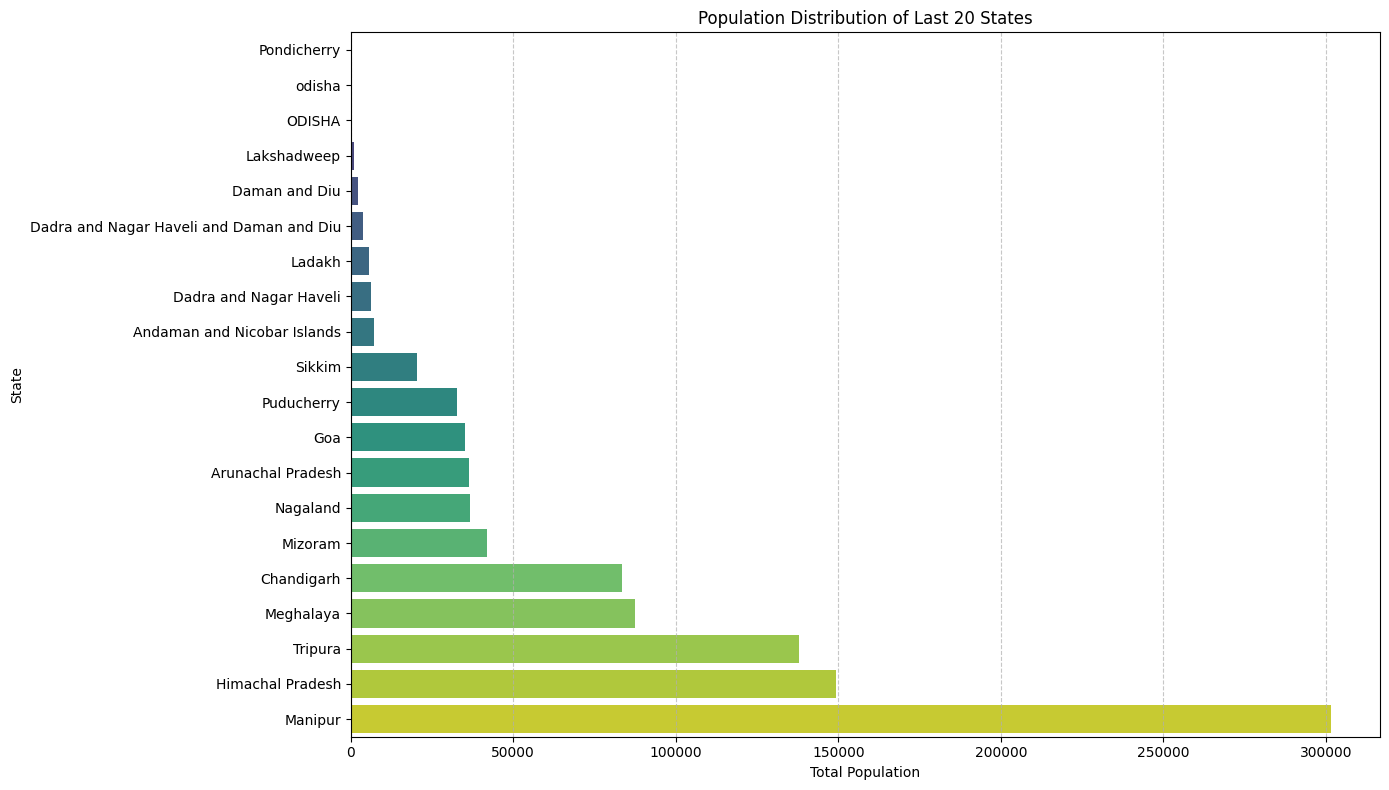

In [ ]:
df['total_population'] = df['demo_age_5_17'] + df['demo_age_17_']

state_population = df.groupby('state')['total_population'].sum().reset_index()

last_20_states = state_population.nsmallest(20, 'total_population')

print("Last 20 States by Total Population:")
display(last_20_states)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x='total_population', y='state', data=last_20_states, hue='state', palette='viridis', legend=False)
plt.title('Population Distribution of Last 20 States')
plt.xlabel('Total Population')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

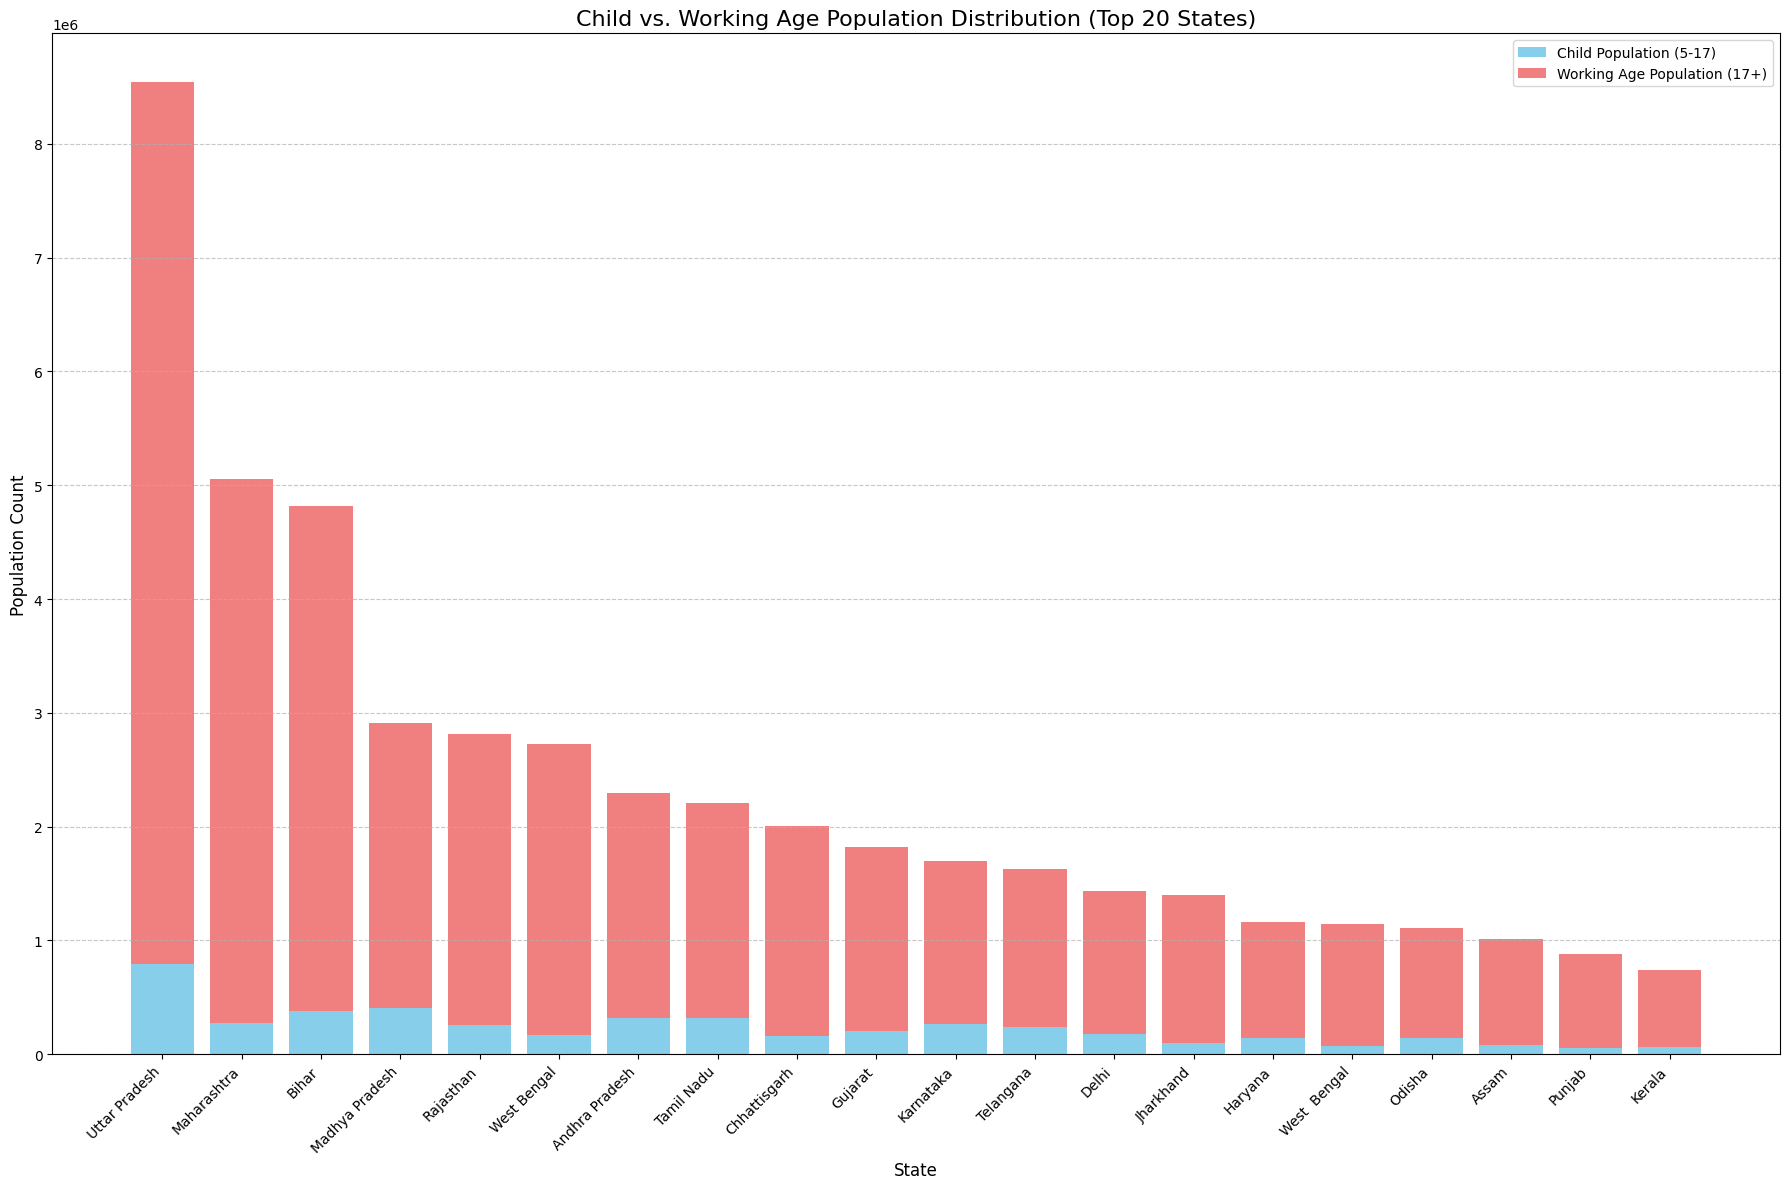

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'state' and calculate the sum of 'demo_age_5_17' and 'demo_age_17_'
state_population_demographics = df.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()

# Calculate total population for sorting purposes
state_population_demographics['total_population'] = state_population_demographics['demo_age_5_17'] + state_population_demographics['demo_age_17_']

# Sort by Total_Population and select the top 20 states
top_20_states_demographics = state_population_demographics.nlargest(20, 'total_population')

# Ensure top_20_states_demographics is sorted by total_population for consistent display
top_20_states_demographics_sorted = top_20_states_demographics.sort_values(by='total_population', ascending=False)

plt.figure(figsize=(18, 12))

# Create a stacked bar chart
plt.bar(top_20_states_demographics_sorted['state'], top_20_states_demographics_sorted['demo_age_5_17'], color='skyblue', label='Child Population (5-17)')
plt.bar(top_20_states_demographics_sorted['state'], top_20_states_demographics_sorted['demo_age_17_'], bottom=top_20_states_demographics_sorted['demo_age_5_17'], color='lightcoral', label='Working Age Population (17+)')

plt.title('Child vs. Working Age Population Distribution (Top 20 States)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Population Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

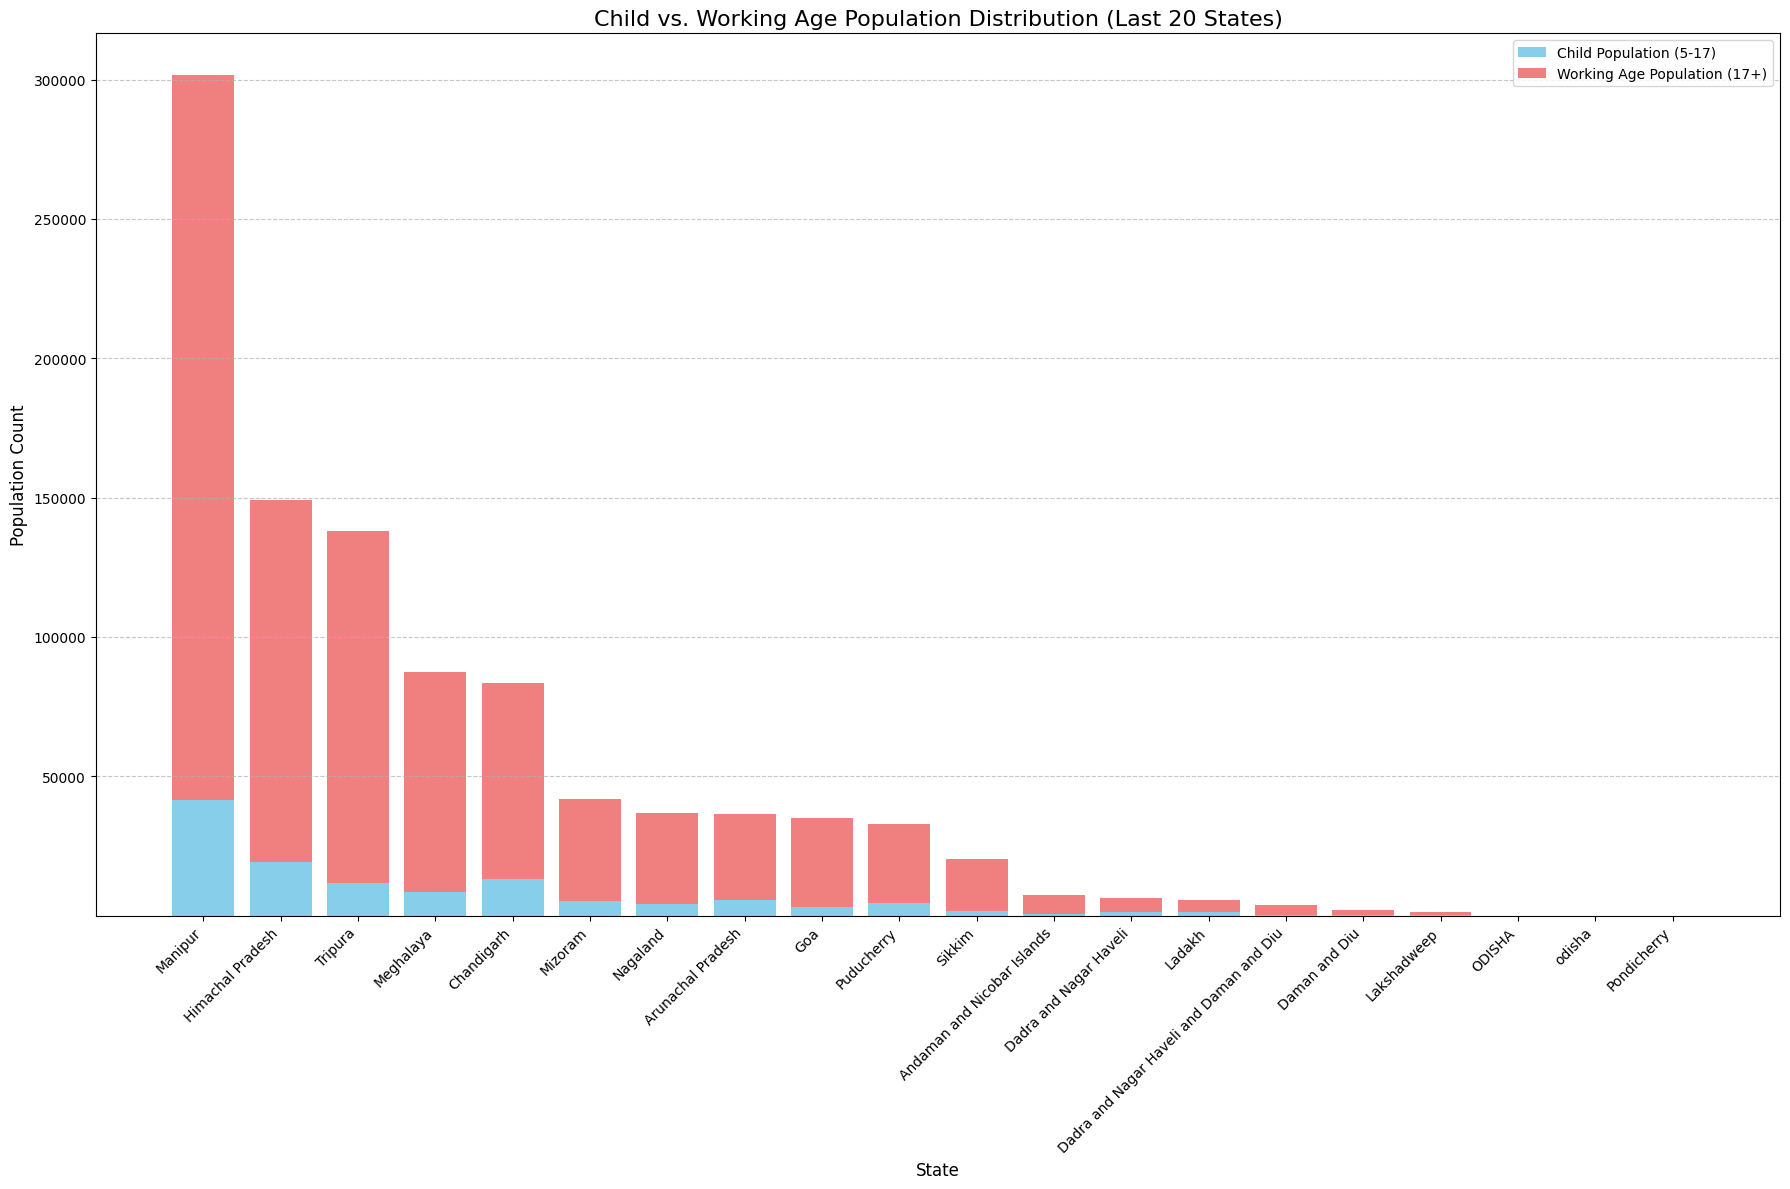

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'state' and calculate the sum of 'demo_age_5_17' and 'demo_age_17_'
state_population = df.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()

# Calculate total population for sorting purposes
state_population['total_population'] = state_population['demo_age_5_17'] + state_population['demo_age_17_']

# Sort by Total_Population and select the last 20 states
last_20_states_demographics = state_population.nsmallest(20, 'total_population')

# Ensure last_20_states_demographics is sorted for consistent display
last_20_states_demographics_sorted = last_20_states_demographics.sort_values(by='total_population', ascending=False)

plt.figure(figsize=(18, 12))

# Create a stacked bar chart
plt.bar(last_20_states_demographics_sorted['state'], last_20_states_demographics_sorted['demo_age_5_17'], color='skyblue', label='Child Population (5-17)')
plt.bar(last_20_states_demographics_sorted['state'], last_20_states_demographics_sorted['demo_age_17_'], bottom=last_20_states_demographics_sorted['demo_age_5_17'], color='lightcoral', label='Working Age Population (17+)')

plt.title('Child vs. Working Age Population Distribution (Last 20 States)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Population Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['month'] = df['date'].dt.month
monthly_population_demographics = df.groupby('month')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()

print("Monthly Population Demographics:")
display(monthly_population_demographics.head())

Monthly Population Demographics:


,month,demo_age_5_17,demo_age_17_
0,3.0,976095.0,10171463.0
1,4.0,198744.0,1316928.0
2,5.0,204893.0,1361394.0
3,6.0,197767.0,1487795.0
4,7.0,288449.0,1932266.0


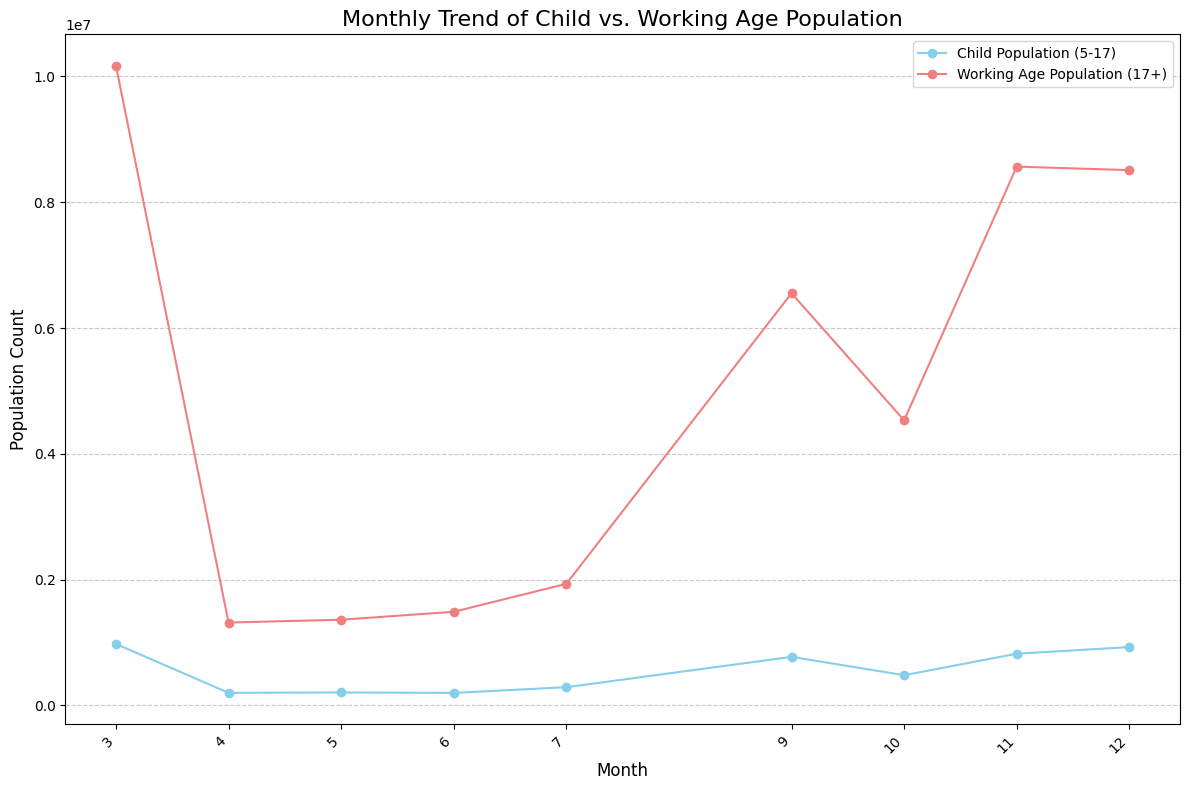

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(monthly_population_demographics['month'], monthly_population_demographics['demo_age_5_17'], color='skyblue', label='Child Population (5-17)', marker='o')
plt.plot(monthly_population_demographics['month'], monthly_population_demographics['demo_age_17_'], color='lightcoral', label='Working Age Population (17+)', marker='o')

plt.title('Monthly Trend of Child vs. Working Age Population', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Population Count', fontsize=12)
plt.xticks(monthly_population_demographics['month'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
n_lags = 3
df_lagged = monthly_population_demographics.copy()

for i in range(1, n_lags + 1):
    df_lagged[f'demo_age_5_17_lag_{i}'] = df_lagged['demo_age_5_17'].shift(i)
    df_lagged[f'demo_age_17__lag_{i}'] = df_lagged['demo_age_17_'].shift(i)

df_lagged = df_lagged.dropna()

print("DataFrame with lag features:")
display(df_lagged.head())

DataFrame with lag features:


,month,demo_age_5_17,demo_age_17_,demo_age_5_17_lag_1,demo_age_17__lag_1,demo_age_5_17_lag_2,demo_age_17__lag_2,demo_age_5_17_lag_3,demo_age_17__lag_3
3,6.0,197767.0,1487795.0,204893.0,1361394.0,198744.0,1316928.0,976095.0,10171463.0
4,7.0,288449.0,1932266.0,197767.0,1487795.0,204893.0,1361394.0,198744.0,1316928.0
5,9.0,770788.0,6553272.0,288449.0,1932266.0,197767.0,1487795.0,204893.0,1361394.0
6,10.0,479232.0,4531734.0,770788.0,6553272.0,288449.0,1932266.0,197767.0,1487795.0
7,11.0,821273.0,8566328.0,479232.0,4531734.0,770788.0,6553272.0,288449.0,1932266.0


In [ ]:
X = df_lagged.drop(columns=['month', 'demo_age_5_17', 'demo_age_17_'])
y_child = df_lagged['demo_age_5_17']
y_working_age = df_lagged['demo_age_17_']

print("Features (X) shape:", X.shape)
print("Target (y_child) shape:", y_child.shape)
print("Target (y_working_age) shape:", y_working_age.shape)

print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 values of y_child:")
display(y_child.head())
print("\nFirst 5 values of y_working_age:")
display(y_working_age.head())

Features (X) shape: (6, 6)
Target (y_child) shape: (6,)
Target (y_working_age) shape: (6,)

First 5 rows of X:


,demo_age_5_17_lag_1,demo_age_17__lag_1,demo_age_5_17_lag_2,demo_age_17__lag_2,demo_age_5_17_lag_3,demo_age_17__lag_3
3,204893.0,1361394.0,198744.0,1316928.0,976095.0,10171463.0
4,197767.0,1487795.0,204893.0,1361394.0,198744.0,1316928.0
5,288449.0,1932266.0,197767.0,1487795.0,204893.0,1361394.0
6,770788.0,6553272.0,288449.0,1932266.0,197767.0,1487795.0
7,479232.0,4531734.0,770788.0,6553272.0,288449.0,1932266.0



First 5 values of y_child:


,demo_age_5_17
3,197767.0
4,288449.0
5,770788.0
6,479232.0
7,821273.0



First 5 values of y_working_age:


,demo_age_17_
3,1487795.0
4,1932266.0
5,6553272.0
6,4531734.0
7,8566328.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor for child population
rf_child = RandomForestRegressor(n_estimators=100, random_state=42)
rf_child.fit(X, y_child)

# Initialize and train the Random Forest Regressor for working age population
rf_working_age = RandomForestRegressor(n_estimators=100, random_state=42)
rf_working_age.fit(X, y_working_age)

print("Random Forest models trained successfully for child and working age populations.")

Random Forest models trained successfully for child and working age populations.


In [ ]:
def predict_next_month(model, last_known_data, n_lags):
    # last_known_data is a list of n_lags [child_pop, working_pop] pairs,
    # where the last element is the most recent.
    # We need n_lags previous time steps to create the features.
    if len(last_known_data) < n_lags: # Corrected condition
        raise ValueError(f"Not enough historical data (expected {n_lags} entries, got {len(last_known_data)}) to create lag features for prediction.")

    input_features_list = []
    # Build input features in the order expected by the model (lag_1, lag_2, ..., lag_n_lags)
    # lag_1 corresponds to the most recent data (last_known_data[-1])
    # lag_2 corresponds to the second most recent data (last_known_data[-2])
    # ...
    # lag_n_lags corresponds to the oldest data required (last_known_data[-n_lags])
    for i in range(1, n_lags + 1):
        # We access elements from the end of last_known_data,
        # so last_known_data[-i] gives us data for lag i
        input_features_list.extend(last_known_data[-i])

    input_features = np.array(input_features_list).reshape(1, -1)

    prediction = model.predict(input_features)[0]
    return prediction

# Get the last n_lags values from the original monthly_population_demographics for prediction initialization
# We need the actual 'demo_age_5_17' and 'demo_age_17_' values for the last n_lags months
last_historical_data = monthly_population_demographics[['demo_age_5_17', 'demo_age_17_']].tail(n_lags).values.tolist()

# Prepare lists to store forecasts
forecasted_child_population = []
forecasted_working_age_population = []

# Number of months to forecast
forecast_horizon = 6

# Make predictions iteratively
current_last_known_data = last_historical_data.copy()

for _ in range(forecast_horizon):
    # Predict child population
    pred_child = predict_next_month(rf_child, current_last_known_data, n_lags)
    forecasted_child_population.append(pred_child)

    # Predict working age population
    pred_working_age = predict_next_month(rf_working_age, current_last_known_data, n_lags)
    forecasted_working_age_population.append(pred_working_age)

    # Update current_last_known_data for the next prediction
    # Remove the oldest data point and add the new prediction
    current_last_known_data.pop(0)
    current_last_known_data.append([pred_child, pred_working_age])

print("Forecasted Child Population for next 6 months:", [int(x) for x in forecasted_child_population])
print("Forecasted Working Age Population for next 6 months:", [int(x) for x in forecasted_working_age_population])

Forecasted Child Population for next 6 months: [839290, 816167, 788079, 818981, 830735, 830735]
Forecasted Working Age Population for next 6 months: [8160308, 7881412, 7599944, 7801835, 7951640, 7951640]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

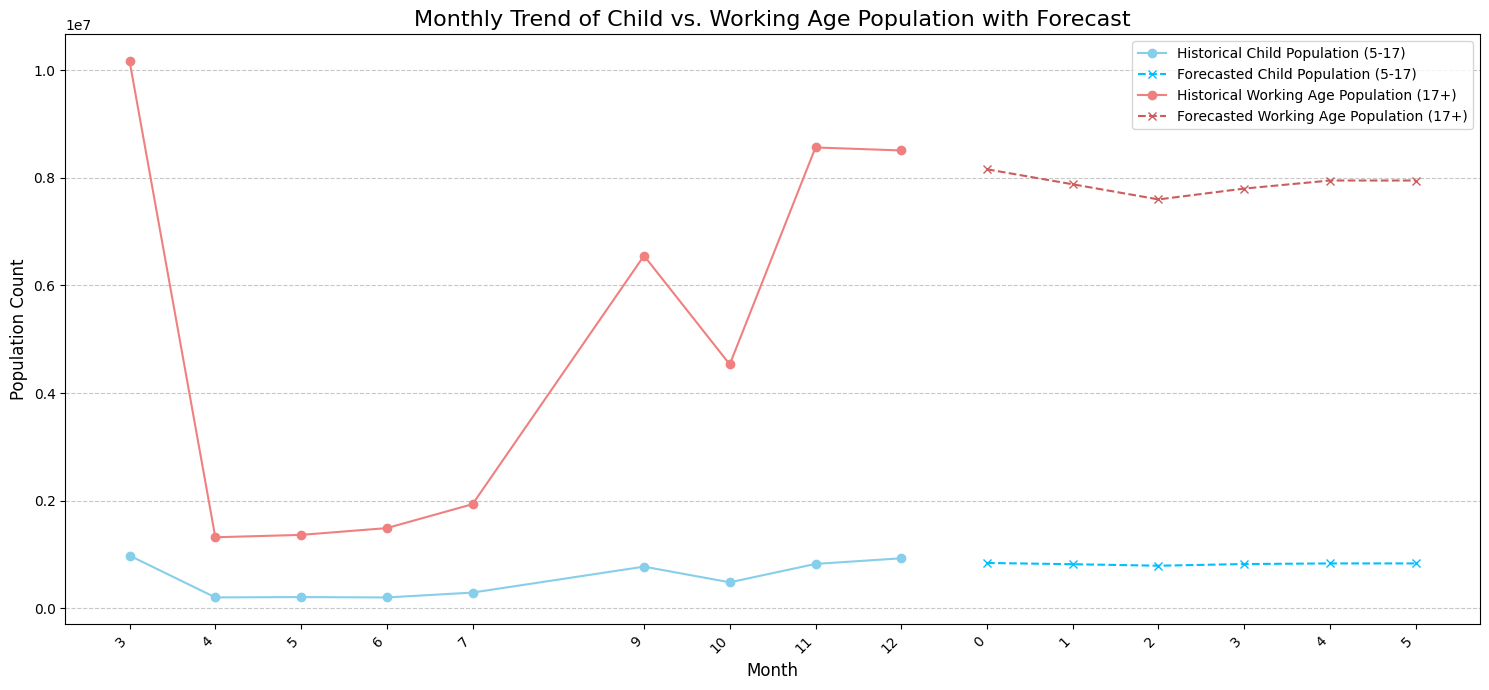

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create month labels for the forecasted period (e.g., if historical ends at 12, forecast starts at 13)
last_historical_month = monthly_population_demographics['month'].max()
forecast_months = range(int(last_historical_month) + 1, int(last_historical_month) + forecast_horizon + 1)

# Create DataFrame for forecasted data
forecast_df = pd.DataFrame({
    'month': list(forecast_months),
    'demo_age_5_17': forecasted_child_population,
    'demo_age_17_': forecasted_working_age_population
})

# Combine historical and forecasted data for plotting
combined_df = pd.concat([monthly_population_demographics, forecast_df], ignore_index=True)

plt.figure(figsize=(15, 7))

# Plot historical and forecasted Child Population
plt.plot(monthly_population_demographics['month'], monthly_population_demographics['demo_age_5_17'], label='Historical Child Population (5-17)', color='skyblue', marker='o')
plt.plot(forecast_df['month'], forecast_df['demo_age_5_17'], label='Forecasted Child Population (5-17)', color='deepskyblue', linestyle='--', marker='x')

# Plot historical and forecasted Working Age Population
plt.plot(monthly_population_demographics['month'], monthly_population_demographics['demo_age_17_'], label='Historical Working Age Population (17+)', color='lightcoral', marker='o')
plt.plot(forecast_df['month'], forecast_df['demo_age_17_'], label='Forecasted Working Age Population (17+)', color='indianred', linestyle='--', marker='x')

plt.title('Monthly Trend of Child vs. Working Age Population with Forecast', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Population Count', fontsize=12)

# Create custom x-tick labels: historical months + 0-indexed forecast months
all_month_ticks = combined_df['month'].tolist()
historical_month_labels = [str(int(m)) for m in monthly_population_demographics['month'].tolist()]
forecast_month_labels = [str(i) for i in range(forecast_horizon)]
all_month_labels = historical_month_labels + forecast_month_labels

plt.xticks(all_month_ticks, all_month_labels, rotation=45, ha='right')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

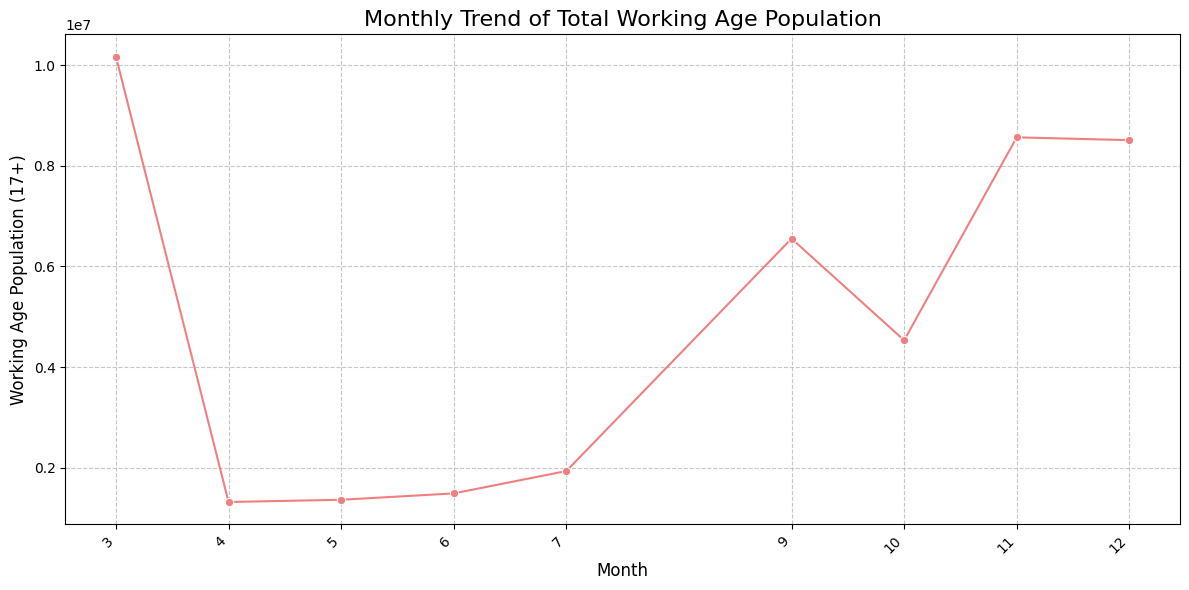

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='demo_age_17_', data=monthly_population_demographics, marker='o', color='lightcoral')

plt.title('Monthly Trend of Total Working Age Population', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Working Age Population (17+)', fontsize=12)
plt.xticks(monthly_population_demographics['month'], rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

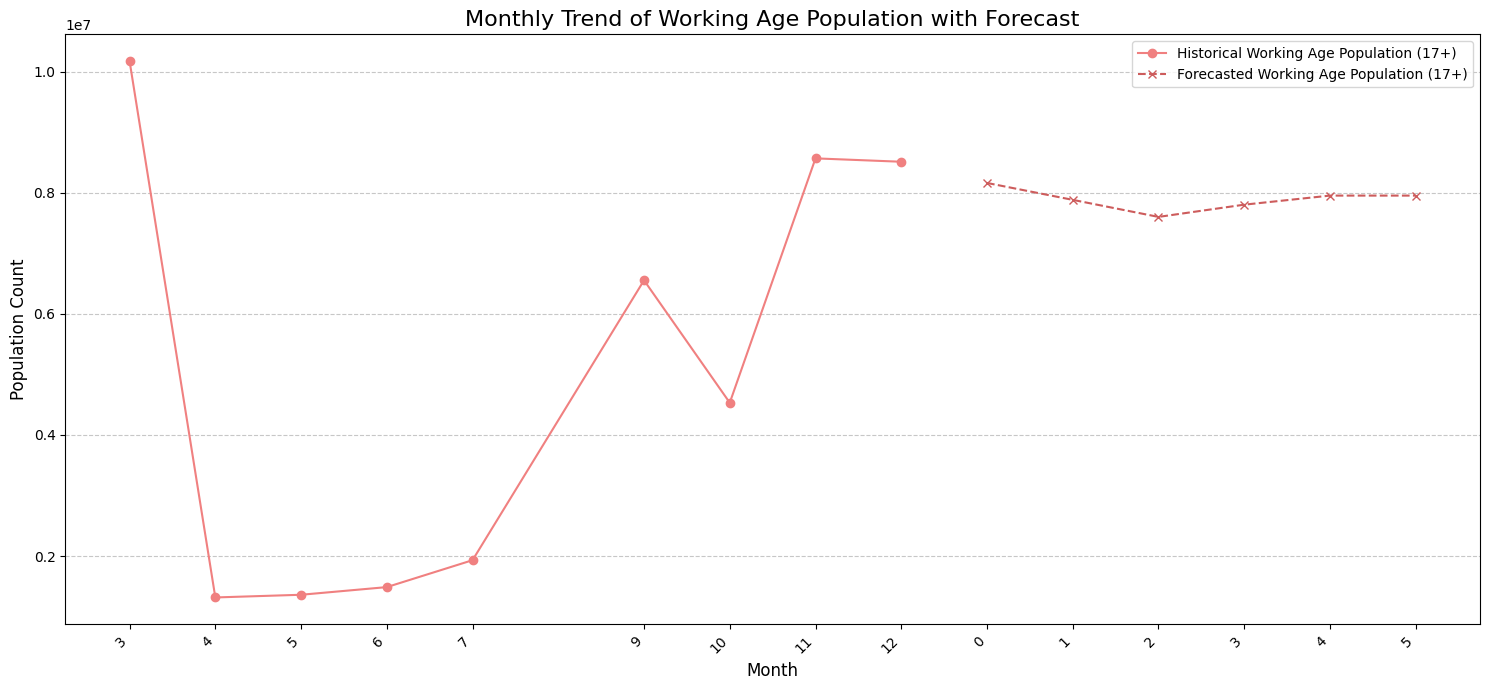

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create month labels for the forecasted period (e.g., if historical ends at 12, forecast starts at 13)
last_historical_month = monthly_population_demographics['month'].max()
forecast_months = range(int(last_historical_month) + 1, int(last_historical_month) + forecast_horizon + 1)

# Create DataFrame for forecasted data for working age population only
forecast_working_age_df = pd.DataFrame({
    'month': list(forecast_months),
    'demo_age_17_': forecasted_working_age_population
})

# Combine historical and forecasted data for working age population for plotting
combined_working_age_df = pd.concat([
    monthly_population_demographics[['month', 'demo_age_17_']],
    forecast_working_age_df
], ignore_index=True)

plt.figure(figsize=(15, 7))

# Plot historical Working Age Population
plt.plot(monthly_population_demographics['month'], monthly_population_demographics['demo_age_17_'], label='Historical Working Age Population (17+)', color='lightcoral', marker='o')

# Plot forecasted Working Age Population
plt.plot(forecast_working_age_df['month'], forecast_working_age_df['demo_age_17_'], label='Forecasted Working Age Population (17+)', color='indianred', linestyle='--', marker='x')

plt.title('Monthly Trend of Working Age Population with Forecast', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Population Count', fontsize=12)

# Create custom x-tick labels: historical months + 0-indexed forecast months
all_month_ticks = combined_working_age_df['month'].tolist()
historical_month_labels = [str(int(m)) for m in monthly_population_demographics['month'].tolist()]
forecast_month_labels = [str(i) for i in range(forecast_horizon)]
all_month_labels = historical_month_labels + forecast_month_labels

plt.xticks(all_month_ticks, all_month_labels, rotation=45, ha='right')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
data_for_anomaly_detection = df[['demo_age_5_17', 'demo_age_17_', 'total_population']].copy()
print("DataFrame for anomaly detection created successfully:")
data_for_anomaly_detection.head()

DataFrame for anomaly detection created successfully:


,demo_age_5_17,demo_age_17_,total_population
0,0.0,1.0,1.0
1,0.0,2.0,2.0
2,0.0,6.0,6.0
3,0.0,2.0,2.0
4,0.0,1.0,1.0


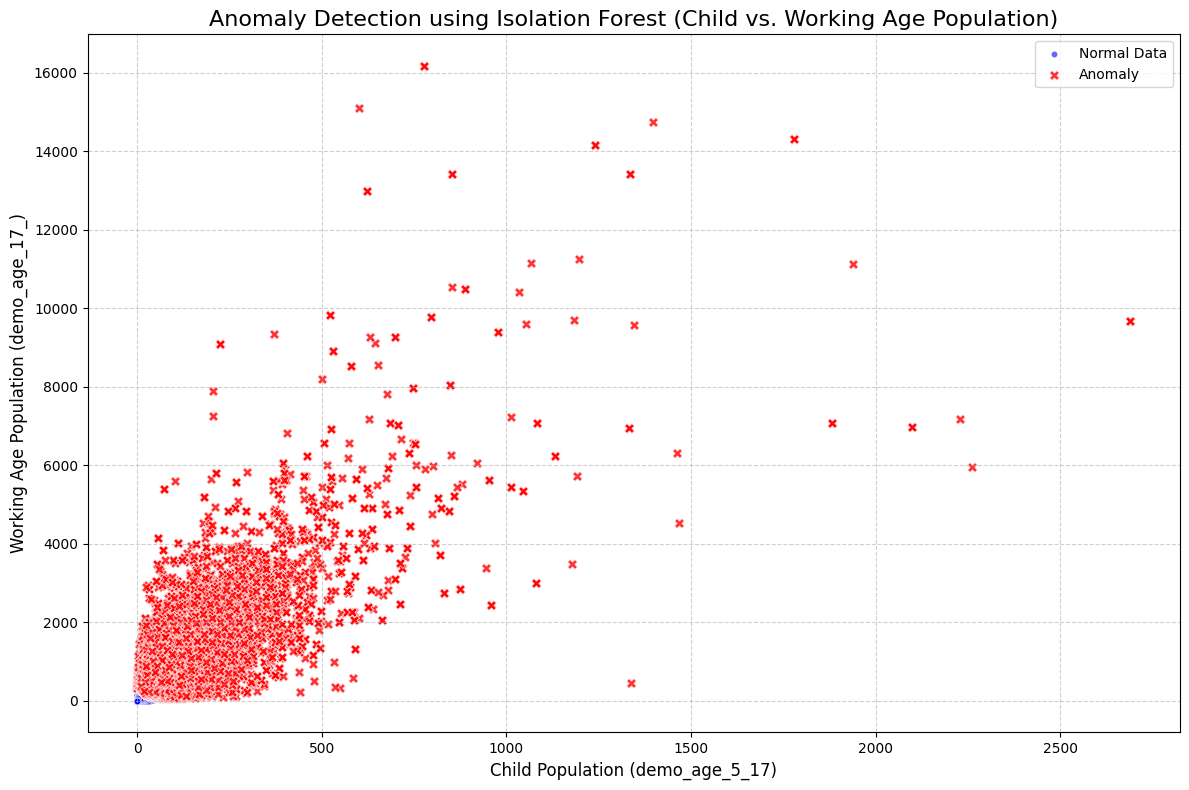

Number of anomalies detected: 20689


In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Re-apply Isolation Forest after making the copy to get the 'anomaly' column correctly
iso_forest = IsolationForest(random_state=42, contamination=0.01)
data_for_anomaly_detection['anomaly'] = iso_forest.fit_predict(data_for_anomaly_detection[['demo_age_5_17', 'demo_age_17_', 'total_population']])

# Separate anomalies from normal data
anomalies = data_for_anomaly_detection[data_for_anomaly_detection['anomaly'] == -1]
normal_data = data_for_anomaly_detection[data_for_anomaly_detection['anomaly'] == 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='demo_age_5_17', y='demo_age_17_', data=normal_data, color='blue', label='Normal Data', alpha=0.6, s=20)
sns.scatterplot(x='demo_age_5_17', y='demo_age_17_', data=anomalies, color='red', label='Anomaly', alpha=0.8, s=50, marker='X')

plt.title('Anomaly Detection using Isolation Forest (Child vs. Working Age Population)', fontsize=16)
plt.xlabel('Child Population (demo_age_5_17)', fontsize=12)
plt.ylabel('Working Age Population (demo_age_17_)', fontsize=12)
plt.legend(loc='upper right') # Explicitly setting legend location
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(f"Number of anomalies detected: {(data_for_anomaly_detection['anomaly'] == -1).sum()}")

In [ ]:
from sklearn.ensemble import IsolationForest

# Instantiate Isolation Forest model
# contamination is the proportion of outliers in the dataset, a value like 'auto' or a float (e.g., 0.01)
iso_forest = IsolationForest(random_state=42, contamination=0.01)

# Fit the model and predict anomalies
# -1 for outliers, 1 for inliers
data_for_anomaly_detection['anomaly'] = iso_forest.fit_predict(data_for_anomaly_detection[['demo_age_5_17', 'demo_age_17_', 'total_population']])

print("Anomaly detection completed. Adding 'anomaly' column to the DataFrame:")
display(data_for_anomaly_detection.head())
print(f"\nNumber of anomalies detected: {(data_for_anomaly_detection['anomaly'] == -1).sum()}")

Anomaly detection completed. Adding 'anomaly' column to the DataFrame:


,demo_age_5_17,demo_age_17_,total_population,anomaly
0,0.0,1.0,1.0,1
1,0.0,2.0,2.0,1
2,0.0,6.0,6.0,1
3,0.0,2.0,2.0,1
4,0.0,1.0,1.0,1



Number of anomalies detected: 20689


In [ ]:
import re

# Retrieve variables that are expected to be set by the user in the markdown cell above.
# Use globals().get() with a default value to make the cell robust in case the @param markdown cell
# did not fully define the variables in the global namespace.

# Default values for forecast_horizon and policy_description if not set by the user.
# These align with the examples provided in the preceding markdown cell.
_default_forecast_horizon = 60
_default_policy_description = "A sustained 0.5% increase in the child population each month."

forecast_horizon = globals().get('forecast_horizon', _default_forecast_horizon)
policy_description = globals().get('policy_description', _default_policy_description)


print(f"Forecast Horizon: {forecast_horizon} months")
print(f"Policy Description: {policy_description}")

# Parse the policy description
policy_type = None
population_group = None
change_value = None
change_unit = None

# Regex for sustained percentage increase
perc_match = re.search(r"A sustained (\d+\.?\d*)% increase in the (child|working-age) population each month", policy_description)
# Regex for one-time increase
one_time_match = re.search(r"A one-time increase of (\d+) individuals to the (child|working-age) population in the first month of the forecast", policy_description)

if perc_match:
    policy_type = "sustained_percentage"
    change_value = float(perc_match.group(1)) / 100 # Convert percentage to decimal
    population_group = perc_match.group(2)
    change_unit = "percentage"
    print(f"Parsed Policy: Type='{policy_type}', Group='{population_group}', Change={change_value*100}%, Unit='{change_unit}'")
elif one_time_match:
    policy_type = "one_time_increase"
    change_value = int(one_time_match.group(1))
    population_group = one_time_match.group(2)
    change_unit = "absolute_count"
    print(f"Parsed Policy: Type='{policy_type}', Group='{population_group}', Change={change_value}, Unit='{change_unit}'")
else:
    print("Policy description could not be parsed. Please ensure it follows one of the specified formats.")
    # Optionally, you might want to raise an error or set defaults here


Forecast Horizon: 6 months
Policy Description: A sustained 0.5% increase in the child population each month.
Parsed Policy: Type='sustained_percentage', Group='child', Change=0.5%, Unit='percentage'


In [ ]:
import numpy as np

# Re-using the predict_next_month function from previous steps
# def predict_next_month(model, last_known_data, n_lags):
#     if len(last_known_data) < n_lags:
#         raise ValueError(f"Not enough historical data (expected {n_lags} entries, got {len(last_known_data)}) to create lag features for prediction.")

#     input_features_list = []
#     for i in range(1, n_lags + 1):
#         input_features_list.extend(last_known_data[-i])

#     input_features = np.array(input_features_list).reshape(1, -1)
#     prediction = model.predict(input_features)[0]
#     return prediction

# Initialize lists to store simulated forecasts
simulated_child_population = []
simulated_working_age_population = []

# Get the last n_lags values from the original monthly_population_demographics for prediction initialization
# This is the starting point for our simulation.
last_historical_data_for_simulation = monthly_population_demographics[['demo_age_5_17', 'demo_age_17_']].tail(n_lags).values.tolist()
current_last_known_data_sim = last_historical_data_for_simulation.copy()

print(f"Starting simulation for {forecast_horizon} months with policy: {policy_description}")

for month_idx in range(forecast_horizon):
    # Predict child population
    pred_child = predict_next_month(rf_child, current_last_known_data_sim, n_lags)

    # Predict working age population
    pred_working_age = predict_next_month(rf_working_age, current_last_known_data_sim, n_lags)

    # Apply policy intervention
    if policy_type == "sustained_percentage":
        if population_group == "child":
            pred_child *= (1 + change_value)
        elif population_group == "working-age":
            pred_working_age *= (1 + change_value)
    elif policy_type == "one_time_increase" and month_idx == 0: # Apply only in the first month
        if population_group == "child":
            pred_child += change_value
        elif population_group == "working-age":
            pred_working_age += change_value

    # Ensure populations don't go below zero after policy application
    pred_child = max(0, pred_child)
    pred_working_age = max(0, pred_working_age)

    simulated_child_population.append(pred_child)
    simulated_working_age_population.append(pred_working_age)

    # Update current_last_known_data_sim for the next prediction
    # Remove the oldest data point and add the new policy-adjusted predictions
    current_last_known_data_sim.pop(0)
    current_last_known_data_sim.append([pred_child, pred_working_age])

print("\nSimulated Child Population for next months:")
print([int(x) for x in simulated_child_population])
print("\nSimulated Working Age Population for next months:")
print([int(x) for x in simulated_working_age_population])

Starting simulation for 6 months with policy: A sustained 0.5% increase in the child population each month.

Simulated Child Population for next months:
[843486, 820248, 792020, 823076, 834889, 834889]

Simulated Working Age Population for next months:
[8160308, 7881412, 7599944, 7801835, 7951640, 7951640]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

In [ ]:
import numpy as np
import pandas as pd # Import pandas here as it's needed for DataFrame creation

def predict_next_month(model, last_known_data, n_lags, feature_names):
    # last_known_data is a list of n_lags [child_pop, working_pop] pairs,
    # where the last element is the most recent.
    # We need n_lags previous time steps to create the features.
    if len(last_known_data) < n_lags:
        raise ValueError(f"Not enough historical data (expected {n_lags} entries, got {len(last_known_data)}) to create lag features for prediction.")

    input_features_list = []
    # Build input features in the order expected by the model (lag_1, lag_2, ..., lag_n_lags)
    # lag_1 corresponds to the most recent data (last_known_data[-1])
    # lag_2 corresponds to the second most recent data (last_known_data[-2])
    # ...
    # lag_n_lags corresponds to the oldest data required (last_known_data[-n_lags])
    for i in range(1, n_lags + 1):
        # We access elements from the end of last_known_data,
        # so last_known_data[-i] gives us data for lag i
        input_features_list.extend(last_known_data[-i])

    # Convert the list of features into a pandas DataFrame with the correct column names
    input_df = pd.DataFrame([input_features_list], columns=feature_names)

    prediction = model.predict(input_df)[0]
    return prediction

# Initialize lists to store simulated forecasts
simulated_child_population = []
simulated_working_age_population = []

# Get the last n_lags values from the original monthly_population_demographics for prediction initialization
# This is the starting point for our simulation.
last_historical_data_for_simulation = monthly_population_demographics[['demo_age_5_17', 'demo_age_17_']].tail(n_lags).values.tolist()
current_last_known_data_sim = last_historical_data_for_simulation.copy()

print(f"Starting simulation for {forecast_horizon} months with policy: {policy_description}")

for month_idx in range(forecast_horizon):
    # Predict child population, passing X.columns for feature names
    pred_child = predict_next_month(rf_child, current_last_known_data_sim, n_lags, X.columns)

    # Predict working age population, passing X.columns for feature names
    pred_working_age = predict_next_month(rf_working_age, current_last_known_data_sim, n_lags, X.columns)

    # Apply policy intervention
    if policy_type == "sustained_percentage":
        if population_group == "child":
            pred_child *= (1 + change_value)
        elif population_group == "working-age":
            pred_working_age *= (1 + change_value)
    elif policy_type == "one_time_increase" and month_idx == 0: # Apply only in the first month
        if population_group == "child":
            pred_child += change_value
        elif population_group == "working-age":
            pred_working_age += change_value

    # Ensure populations don't go below zero after policy application
    pred_child = max(0, pred_child)
    pred_working_age = max(0, pred_working_age)

    simulated_child_population.append(pred_child)
    simulated_working_age_population.append(pred_working_age)

    # Update current_last_known_data_sim for the next prediction
    # Remove the oldest data point and add the new policy-adjusted predictions
    current_last_known_data_sim.pop(0)
    current_last_known_data_sim.append([pred_child, pred_working_age])

print("\nSimulated Child Population for next months:")
print([int(x) for x in simulated_child_population])
print("\nSimulated Working Age Population for next months:")
print([int(x) for x in simulated_working_age_population])

Starting simulation for 6 months with policy: A sustained 0.5% increase in the child population each month.

Simulated Child Population for next months:
[843486, 820248, 792020, 823076, 834889, 834889]

Simulated Working Age Population for next months:
[8160308, 7881412, 7599944, 7801835, 7951640, 7951640]


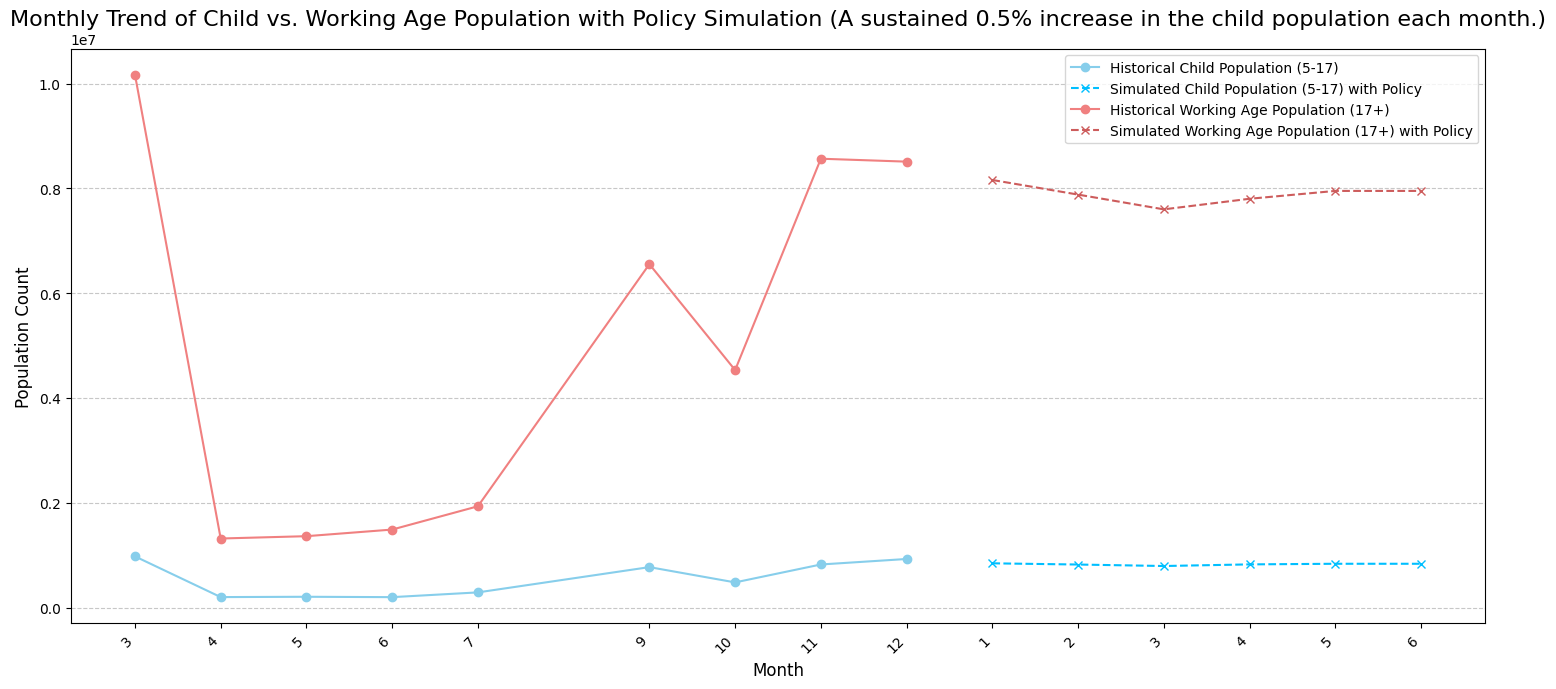

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create month labels for the forecasted period (e.g., if historical ends at 12, forecast starts at 13)
last_historical_month = monthly_population_demographics['month'].max()

# Adjust forecast_months to start from the month *after* the last historical month
# and go for the duration of the forecast_horizon
forecast_months = range(int(last_historical_month) + 1, int(last_historical_month) + forecast_horizon + 1)

# Create DataFrame for simulated data
simulated_df = pd.DataFrame({
    'month': list(forecast_months),
    'demo_age_5_17': simulated_child_population,
    'demo_age_17_': simulated_working_age_population
})

# Combine historical and simulated data for plotting
combined_simulated_df = pd.concat([monthly_population_demographics, simulated_df], ignore_index=True)

plt.figure(figsize=(15, 7))

# Plot historical and simulated Child Population
plt.plot(monthly_population_demographics['month'], monthly_population_demographics['demo_age_5_17'], label='Historical Child Population (5-17)', color='skyblue', marker='o')
plt.plot(simulated_df['month'], simulated_df['demo_age_5_17'], label='Simulated Child Population (5-17) with Policy', color='deepskyblue', linestyle='--', marker='x')

# Plot historical and simulated Working Age Population
plt.plot(monthly_population_demographics['month'], monthly_population_demographics['demo_age_17_'], label='Historical Working Age Population (17+)', color='lightcoral', marker='o')
plt.plot(simulated_df['month'], simulated_df['demo_age_17_'], label='Simulated Working Age Population (17+) with Policy', color='indianred', linestyle='--', marker='x')

plt.title(f'Monthly Trend of Child vs. Working Age Population with Policy Simulation ({policy_description})', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Population Count', fontsize=12)

# Create custom x-tick labels: historical months + 1-indexed forecast months
all_month_ticks = combined_simulated_df['month'].tolist()
historical_month_labels = [str(int(m)) for m in monthly_population_demographics['month'].tolist()]
# Label forecast months relative to the start of the forecast (e.g., Month 1, Month 2, etc.)
forecast_month_labels = [str(i + 1) for i in range(forecast_horizon)] # Changed to 1-indexed
all_month_labels = historical_month_labels + forecast_month_labels

# Ensure that the number of labels matches the number of ticks
if len(all_month_ticks) == len(all_month_labels):
    plt.xticks(all_month_ticks, all_month_labels, rotation=45, ha='right')
else:
    # Fallback if labels don't match exactly, e.g., for very long forecasts
    plt.xticks(rotation=45, ha='right')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Initialize lists to store baseline forecasts
baseline_child_population = []
baseline_working_age_population = []

# Get the last n_lags values from the original monthly_population_demographics for prediction initialization
# This is the starting point for our baseline forecast.
last_historical_data_for_baseline = monthly_population_demographics[['demo_age_5_17', 'demo_age_17_']].tail(n_lags).values.tolist()
current_last_known_data_baseline = last_historical_data_for_baseline.copy()

print(f"Generating baseline forecast for {forecast_horizon} months (no policy)...")

for _ in range(forecast_horizon):
    # Predict child population
    pred_child_baseline = predict_next_month(rf_child, current_last_known_data_baseline, n_lags, X.columns)

    # Predict working age population
    pred_working_age_baseline = predict_next_month(rf_working_age, current_last_known_data_baseline, n_lags, X.columns)

    # Append predictions to the baseline lists
    baseline_child_population.append(pred_child_baseline)
    baseline_working_age_population.append(pred_working_age_baseline)

    # Update current_last_known_data_baseline for the next prediction
    # Remove the oldest data point and add the new predictions
    current_last_known_data_baseline.pop(0)
    current_last_known_data_baseline.append([pred_child_baseline, pred_working_age_baseline])

print("\nBaseline Forecasted Child Population for next months:")
print([int(x) for x in baseline_child_population])
print("\nBaseline Forecasted Working Age Population for next months:")
print([int(x) for x in baseline_working_age_population])

Generating baseline forecast for 6 months (no policy)...

Baseline Forecasted Child Population for next months:
[839290, 816167, 788079, 818981, 830735, 830735]

Baseline Forecasted Working Age Population for next months:
[8160308, 7881412, 7599944, 7801835, 7951640, 7951640]


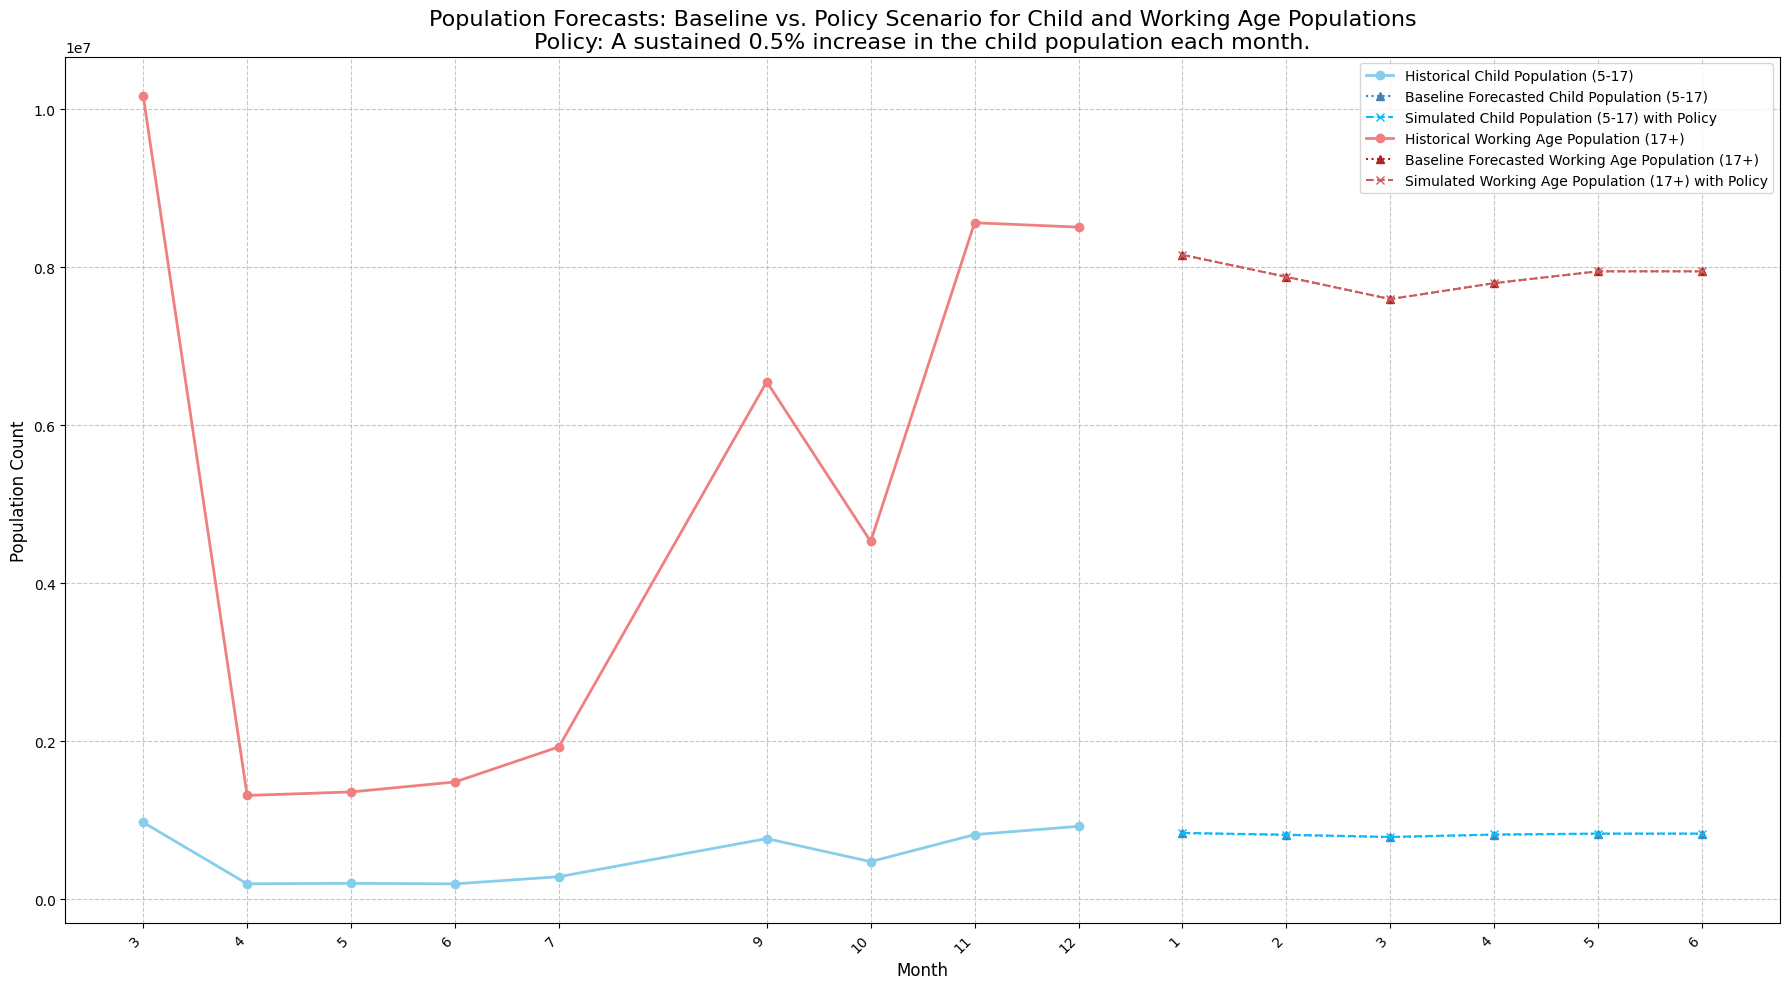

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame for baseline data
baseline_df = pd.DataFrame({
    'month': list(forecast_months), # forecast_months is defined in previous cells
    'demo_age_5_17': baseline_child_population, # from previous cell
    'demo_age_17_': baseline_working_age_population # from previous cell
})

plt.figure(figsize=(18, 10))

# Plot historical child population
plt.plot(monthly_population_demographics['month'], monthly_population_demographics['demo_age_5_17'],
         label='Historical Child Population (5-17)', color='skyblue', marker='o', linewidth=2)

# Plot baseline forecasted child population
plt.plot(baseline_df['month'], baseline_df['demo_age_5_17'],
         label='Baseline Forecasted Child Population (5-17)', color='steelblue', linestyle=':', marker='^', markersize=6)

# Plot policy-affected simulated child population
plt.plot(simulated_df['month'], simulated_df['demo_age_5_17'],
         label='Simulated Child Population (5-17) with Policy', color='deepskyblue', linestyle='--', marker='x', markersize=6)

# Plot historical working-age population
plt.plot(monthly_population_demographics['month'], monthly_population_demographics['demo_age_17_'],
         label='Historical Working Age Population (17+)', color='lightcoral', marker='o', linewidth=2)

# Plot baseline forecasted working-age population
plt.plot(baseline_df['month'], baseline_df['demo_age_17_'],
         label='Baseline Forecasted Working Age Population (17+)', color='firebrick', linestyle=':', marker='^', markersize=6)

# Plot policy-affected simulated working-age population
plt.plot(simulated_df['month'], simulated_df['demo_age_17_'],
         label='Simulated Working Age Population (17+) with Policy', color='indianred', linestyle='--', marker='x', markersize=6)

plt.title(f'Population Forecasts: Baseline vs. Policy Scenario for Child and Working Age Populations\nPolicy: {policy_description}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Population Count', fontsize=12)

# Create combined month labels similar to previous plotting cells
all_month_ticks_combined = pd.concat([monthly_population_demographics['month'], baseline_df['month']]).unique()
all_month_ticks_combined.sort()

historical_month_labels = [str(int(m)) for m in monthly_population_demographics['month'].tolist()]
forecast_month_labels = [str(i + 1) for i in range(forecast_horizon)] # Changed to 1-indexed
all_month_labels_combined = historical_month_labels + forecast_month_labels

# Ensure that the number of labels matches the number of ticks
if len(all_month_ticks_combined) == len(all_month_labels_combined):
    plt.xticks(all_month_ticks_combined, all_month_labels_combined, rotation=45, ha='right')
else:
    # Fallback if labels don't match exactly
    plt.xticks(rotation=45, ha='right')

plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print(f"--- Quantitative Comparison for Forecast Horizon of {forecast_horizon} months ---")

# Get final values for baseline
final_baseline_child = baseline_child_population[-1]
final_baseline_working_age = baseline_working_age_population[-1]

# Get final values for policy scenario
final_simulated_child = simulated_child_population[-1]
final_simulated_working_age = simulated_working_age_population[-1]

print(f"\nBaseline Final Child Population: {final_baseline_child:,.0f}")
print(f"Policy Final Child Population: {final_simulated_child:,.0f}")

print(f"Baseline Final Working Age Population: {final_baseline_working_age:,.0f}")
print(f"Policy Final Working Age Population: {final_simulated_working_age:,.0f}")

# Calculate differences for child population
diff_child_abs = final_simulated_child - final_baseline_child
diff_child_perc = (diff_child_abs / final_baseline_child) * 100 if final_baseline_child != 0 else np.nan

print(f"\nChild Population Difference (Absolute): {diff_child_abs:,.0f}")
print(f"Child Population Difference (Percentage): {diff_child_perc:,.2f}%")

# Calculate differences for working-age population
diff_working_age_abs = final_simulated_working_age - final_baseline_working_age
diff_working_age_perc = (diff_working_age_abs / final_baseline_working_age) * 100 if final_baseline_working_age != 0 else np.nan

print(f"\nWorking Age Population Difference (Absolute): {diff_working_age_abs:,.0f}")
print(f"Working Age Population Difference (Percentage): {diff_working_age_perc:,.2f}%")

print(f"\nPolicy Intervention: {policy_description}")


--- Quantitative Comparison for Forecast Horizon of 6 months ---

Baseline Final Child Population: 830,736
Policy Final Child Population: 834,889
Baseline Final Working Age Population: 7,951,640
Policy Final Working Age Population: 7,951,640

Child Population Difference (Absolute): 4,154
Child Population Difference (Percentage): 0.50%

Working Age Population Difference (Absolute): 0
Working Age Population Difference (Percentage): 0.00%

Policy Intervention: A sustained 0.5% increase in the child population each month.
